# Wine Quality Clustering with KMeans

### Project Overview:

In this project, I applied KMeans clustering to explore patterns in wine quality based on a variety of chemical properties such as acidity, sugar levels, pH, and alcohol content. The primary objective is to group wines with similar chemical characteristics into distinct clusters and analyze how these clusters relate to wine quality ratings. 

By performing this analysis, I hope to offer a data-driven approach to understand of certain features impact the quality rating of wines.

### Data Overview

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# View dataframe 
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# View shape of df
df.shape

(1599, 12)

In [4]:
# Replace space's with underscore
df.columns = df.columns.str.replace(' ', '_')

# view new column names
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Exploratory Data Analysis

In [5]:
# Review df columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Summary statistics of the data 
df.describe().T

count       mean        std      min      25%  \
fixed_acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile_acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric_acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual_sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free_sulfur_dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total_sulfur_dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed_acidity          7.90000   9.200000   15.90000  
volatile_acidity       0.52000   0.640000    1.58000  
citric_acid            0.26000   0.420000    1.00000  
residual_sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free_sulfur_dioxide   14.00000  21.000000   72.00000  
total_sulfur_dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [7]:
# Detect duplicates
duplicates = df[df.duplicated()]

# view duplicates
duplicates

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

Duplicates will be removed from the DataFrame, as the likelihood of rows having identical values in all columns is extremely low. Eliminating these duplicates will enhance the accuracy of our analysis and improve model performance.

In [8]:
# Drop duplicates
df = df.drop_duplicates()

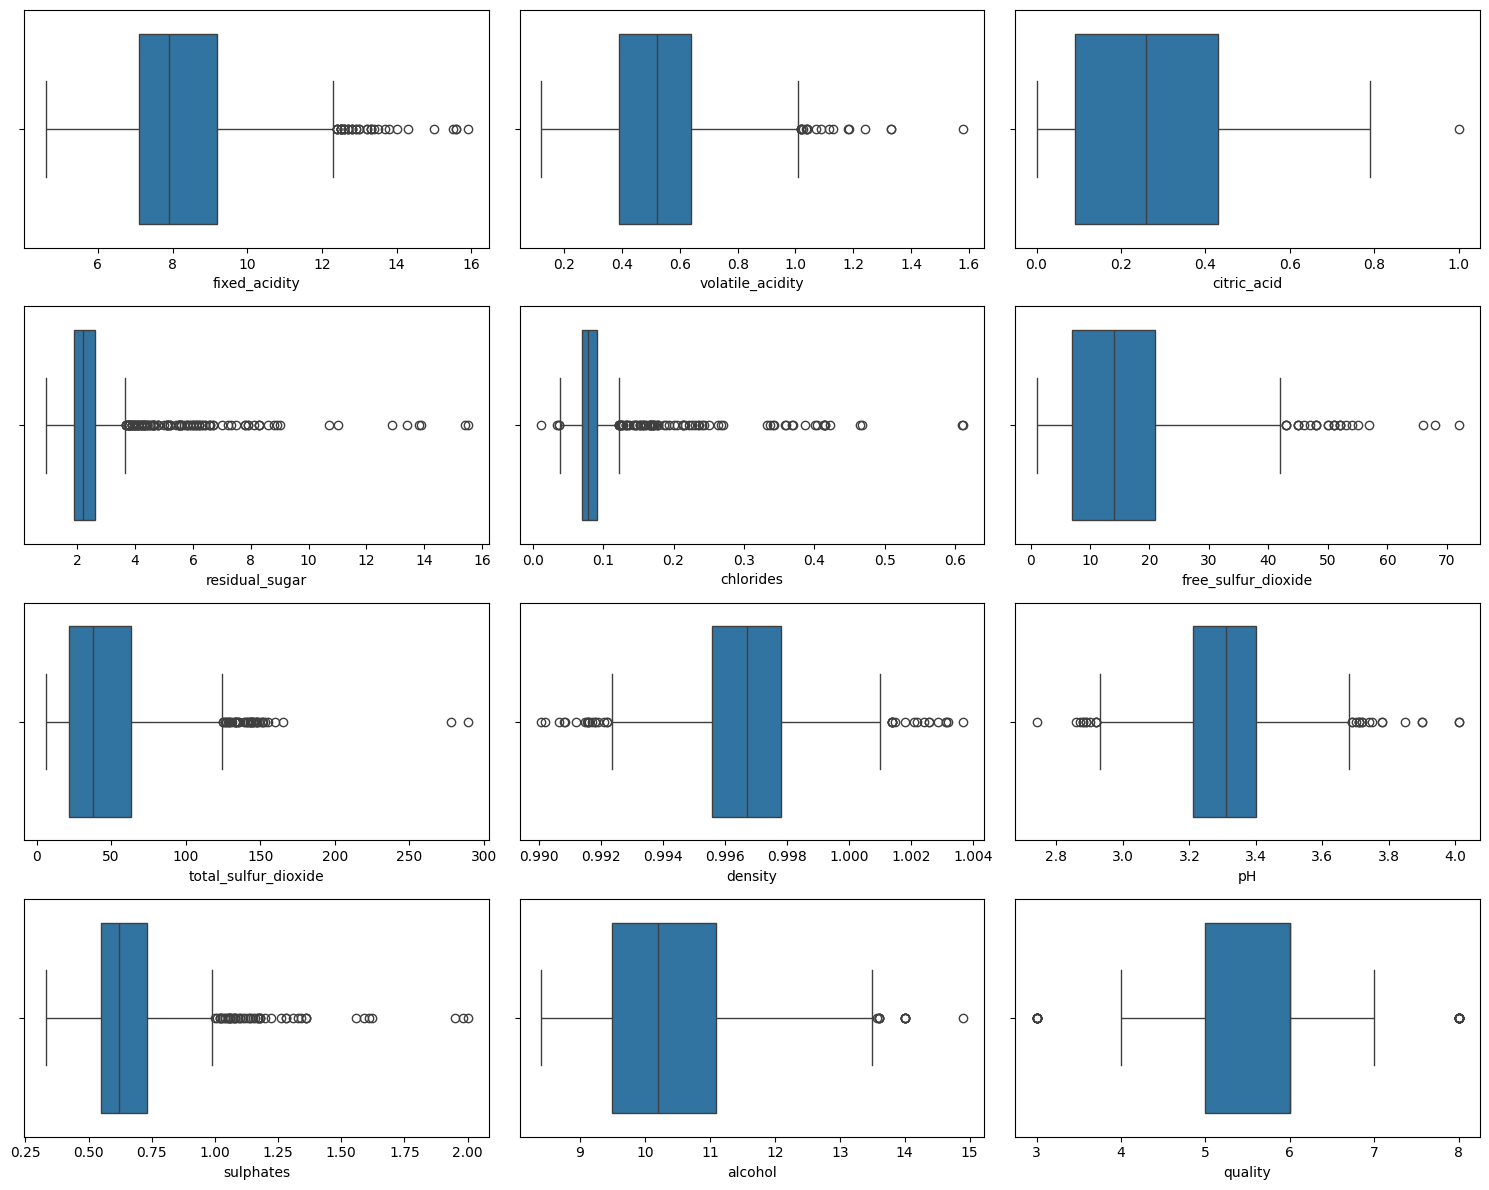

<Figure size 640x480 with 0 Axes>

In [9]:
# Create 4x3 subplot
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Initialize rows and columns used within the subplot
m = 0
n = 0

# Iterate through each column
for i in df.columns:
    sns.boxplot(data=df, x= i, ax=axes[m,n])
    n = n + 1
    if n >= 3:
        n = 0
        m = m + 1
    if m >= 4:
        break

# Show boxplots and outliers
plt.tight_layout()
plt.show()
plt.clf()

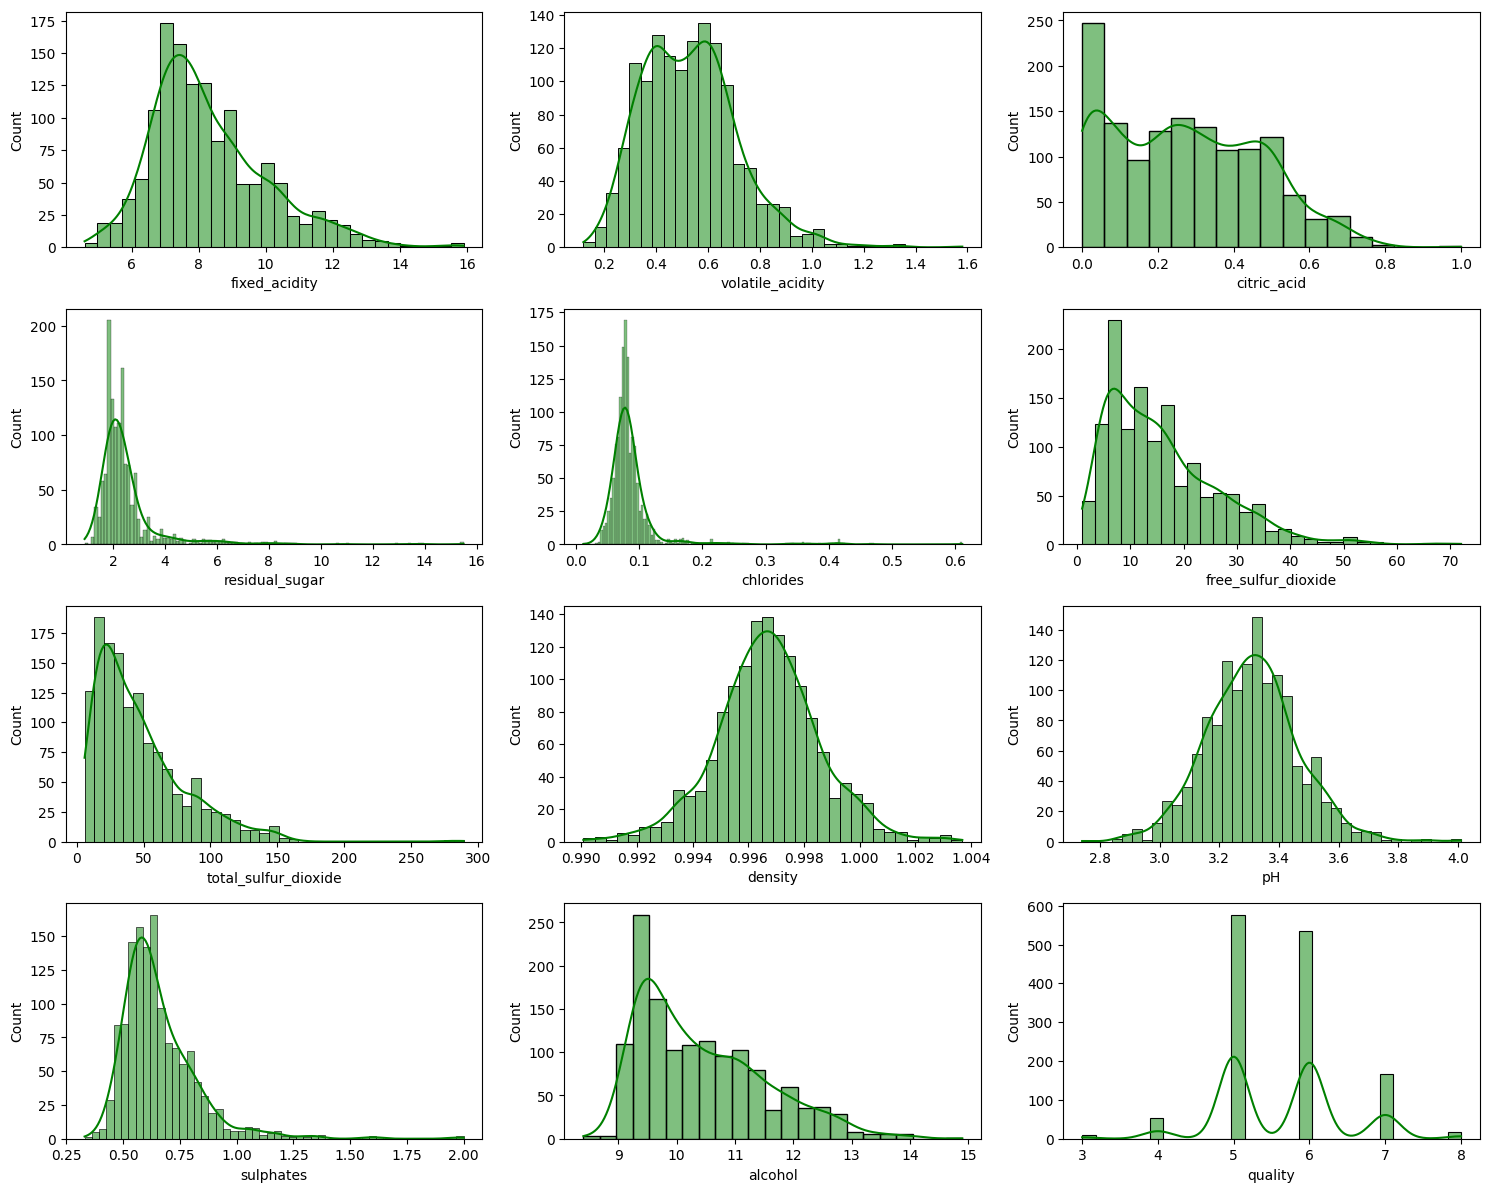

<Figure size 640x480 with 0 Axes>

In [40]:
# create 4x3 subplot
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# initialize rows and columns used within the subplot
f_row = 0
f_col = 0

# iterate through each column
for i in df.columns:
    sns.histplot(data=df, x= i, kde=True, ax=axes[f_row,f_col], color='green')
    f_col = f_col + 1
    if f_col >= 3:
        f_col = 0
        f_row = f_row + 1
    if f_row >= 4:
        break

# Show boxplots and outliers
plt.tight_layout()
plt.show()
plt.clf()

Note
- The volatile acidity, citric acid, and quality features seem to have a bimodal distribution
- This suggest the potential presence of clusters

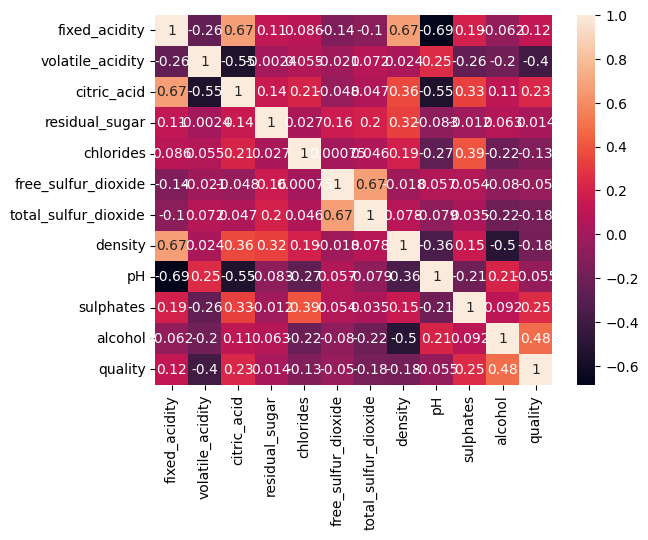

<Figure size 640x480 with 0 Axes>

In [11]:
# Determine correlated variables
sns.heatmap(df.corr(), annot=True)
plt.show()
plt.clf()

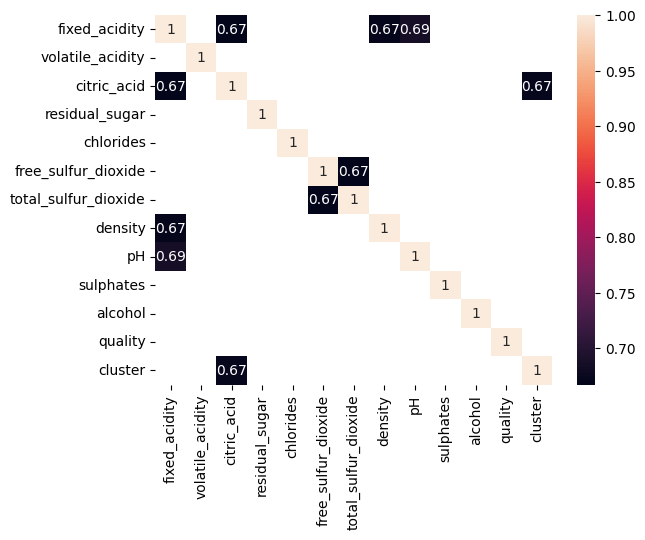

<Figure size 640x480 with 0 Axes>

In [42]:
# Highlight correlated variables
corr =df.corr().abs()
high_corr = corr[(corr > 0.6) | (corr < -0.6)]

sns.heatmap(high_corr ,annot=True)
plt.show()
plt.clf()

Based on the correlation analysis some key features with significant correlation may be the following
- fixed_acidity & citric_acid
- fixed_acidity & density
- free_sulfur_dioxide &total_sulfur_dioxide
- alcohol & quality

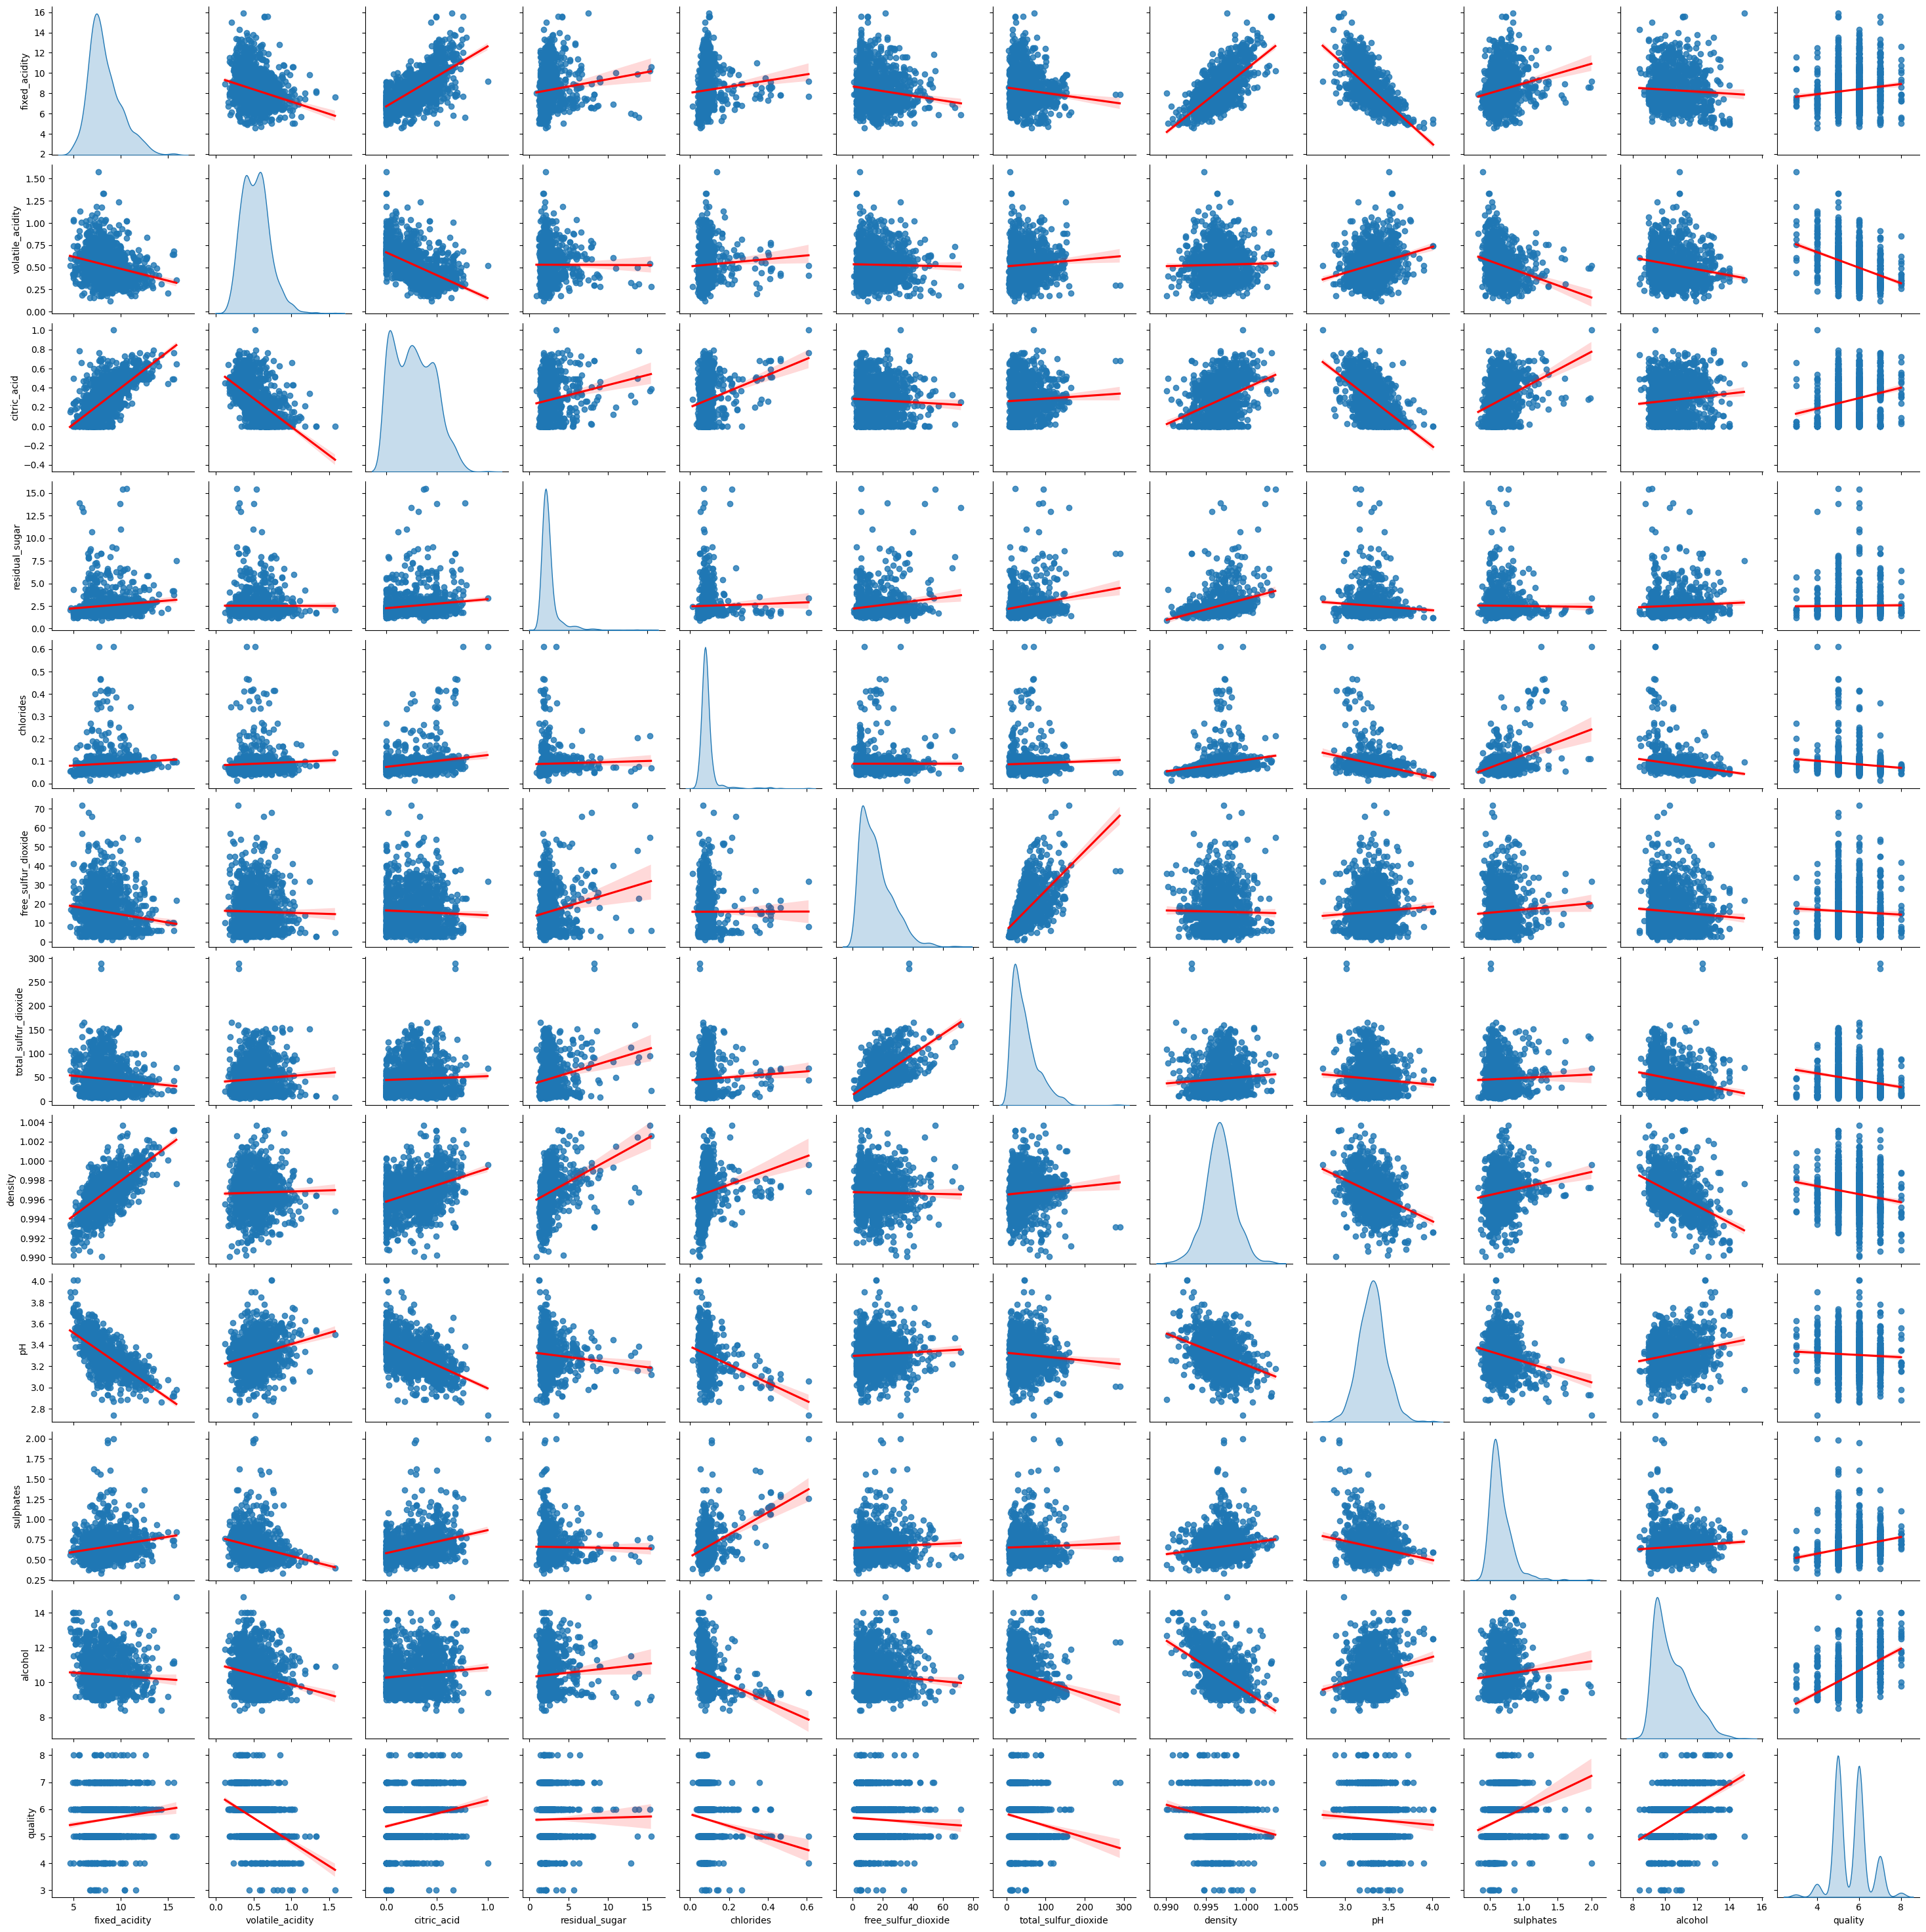

In [13]:
# Create pairpolot with a linear regression
sns.pairplot(df, kind='reg', diag_kind='kde', plot_kws= {'line_kws': {'color': 'red'}})

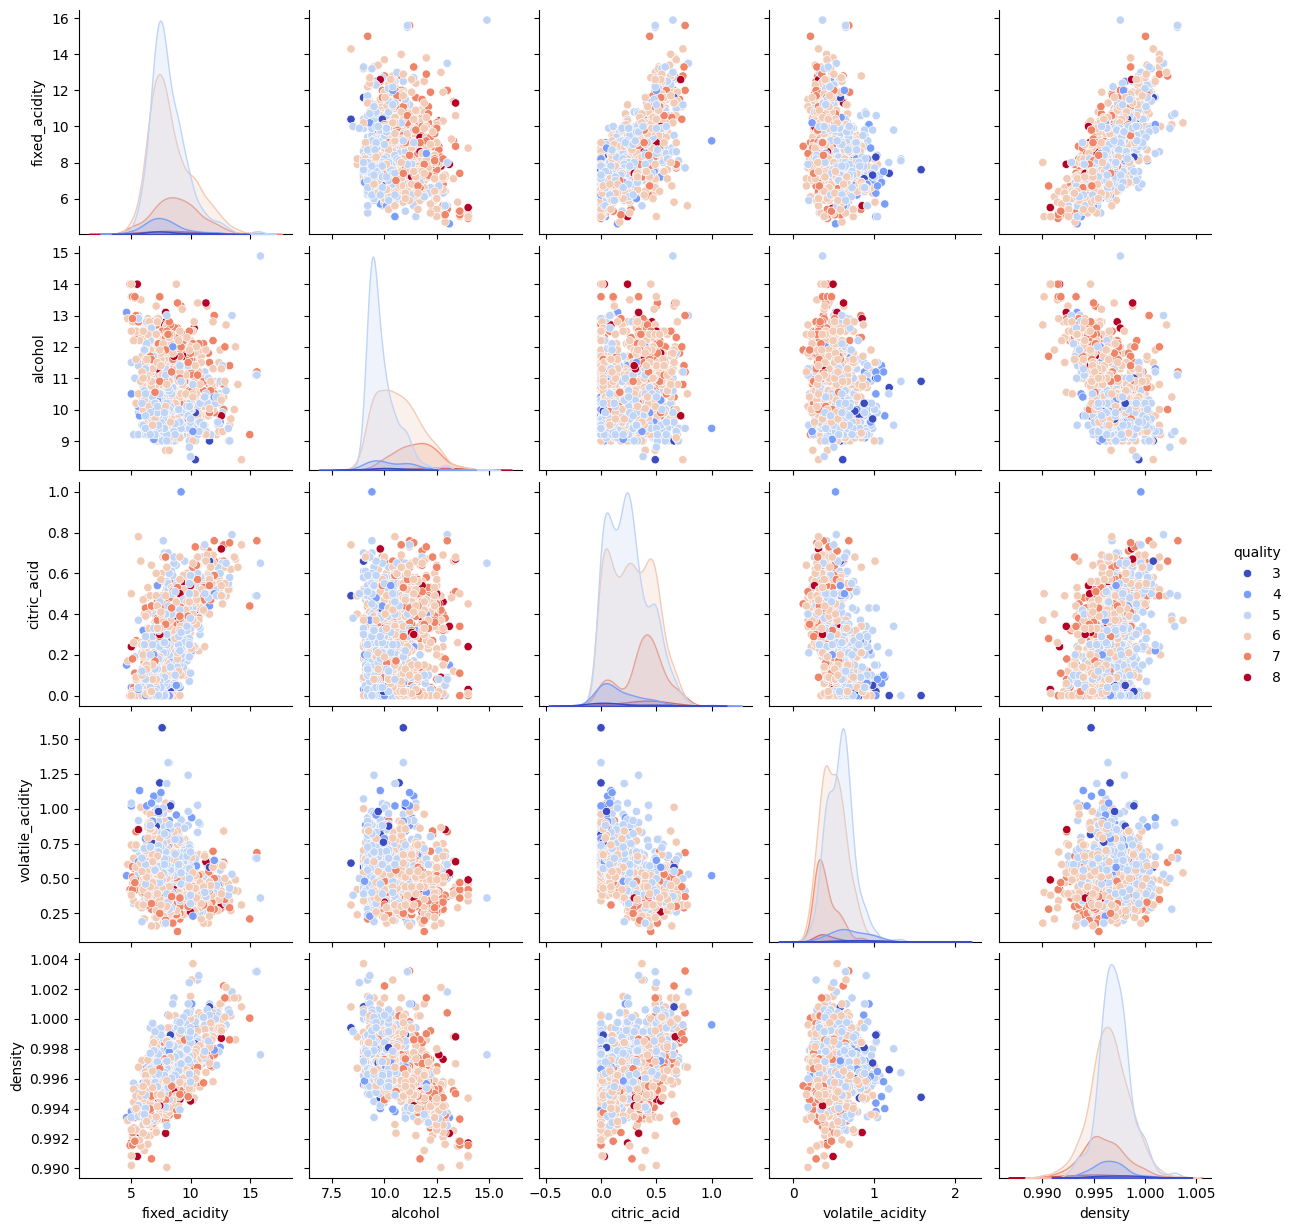

In [14]:
# List of most interesting wine attribures
df_key_features = df[['fixed_acidity', 'alcohol', 'citric_acid', 'volatile_acidity', 'density', 'quality']]

sns.pairplot(df_key_features, hue='quality', palette='coolwarm')

### KMeans Clustering

In [15]:
# Remove the target feature from the dataframe
df_pca = df.drop('quality', axis=1)

##### Identifying the number of clusters

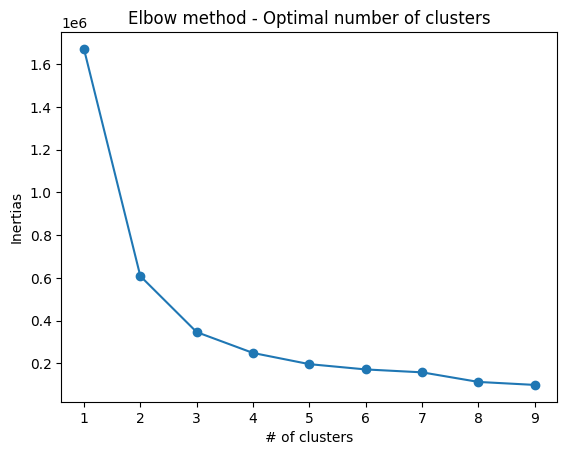

<Figure size 640x480 with 0 Axes>

In [16]:
# Create a list of clusters
num_clusters_elbow = list(range(1,10))

# Create an empty inertias list
inertias = []

# Evaluate performance with different number of clusters
for k in num_clusters_elbow:
    model = KMeans(n_clusters= k, random_state=42)
    model.fit(df_pca)
    inertias.append(model.inertia_)
    
# Plot elbow
plt.plot(num_clusters_elbow, inertias, '-o')
plt.xlabel('# of clusters')
plt.ylabel('Inertias')
plt.title('Elbow method - Optimal number of clusters')
plt.show()
plt.clf()

Silhouette score for 2 clusters is 0.6025450158465153
Silhouette score for 3 clusters is 0.5239872217403813
Silhouette score for 4 clusters is 0.49091588732581176
Silhouette score for 5 clusters is 0.44498593914660706
Silhouette score for 6 clusters is 0.3990429225241788
Silhouette score for 7 clusters is 0.3609221566000774
Silhouette score for 8 clusters is 0.39602562126265684
Silhouette score for 9 clusters is 0.3862904873869948


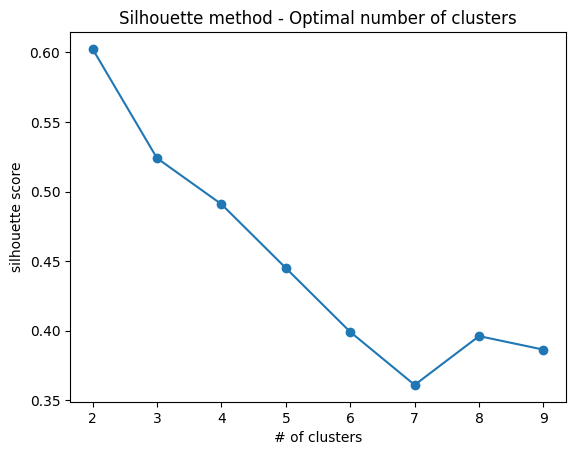

<Figure size 640x480 with 0 Axes>

In [18]:
 # Create a list of clusters
num_clusters_sil = list(range(2,10))

# Create silhouette score list
s_score = []

# Evaluate performance with different number of clusters
for k in num_clusters_sil:
    model = KMeans(n_clusters= k, random_state=42)
    model.fit(df_pca)
    labels = model.labels_
    score = silhouette_score(df_pca, labels)
    s_score.append(score)
    print("Silhouette score for {} clusters is {}".format(k, score))

plt.plot(num_clusters_sil, s_score, '-o')
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette method - Optimal number of clusters')
plt.show()
plt.clf()

Based on the results of the elbow method and silhouette method, the optimal number of clusters is 3

##### PCA Analysis

In [19]:
# Scale data before applying PCA
scaling=StandardScaler()

# Transform the data
scaling.fit(df_pca)
df_scaled_pca=scaling.transform(df_pca)

# Confirm that mean is 0 and std is 1
print("The mean is {} and std is {}".format(np.mean(df_scaled_pca), np.std(df_scaled_pca)))

The mean is 4.622876880060696e-15 and std is 1.0


In [20]:
# Create pca object
pca = PCA()

# Calculating loading score and variation
pca_fit = pca.fit(df_scaled_pca)

# Determine component variance
explained_variance = pca.explained_variance_ratio_
per_var = np.round(explained_variance, decimals=3) * 100

# Cummulative variance
cumulative_variance = np.cumsum(explained_variance)

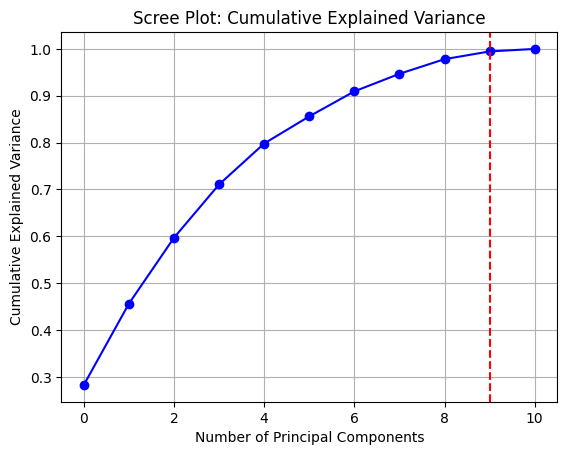

9 principal components are required to explain 95% of the variance.


<Figure size 640x480 with 0 Axes>

In [21]:
# Determine 95% point
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Plot Cumulative explained variance
plt.plot(cumulative_variance, marker='o', color='b')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=components_95, color='red', linestyle='--', label='95% variance')
plt.grid(True)
plt.show()
plt.clf()

# Print the number of components
print(f"{components_95} principal components are required to explain 95% of the variance.")

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/1283528392.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(p_labels)


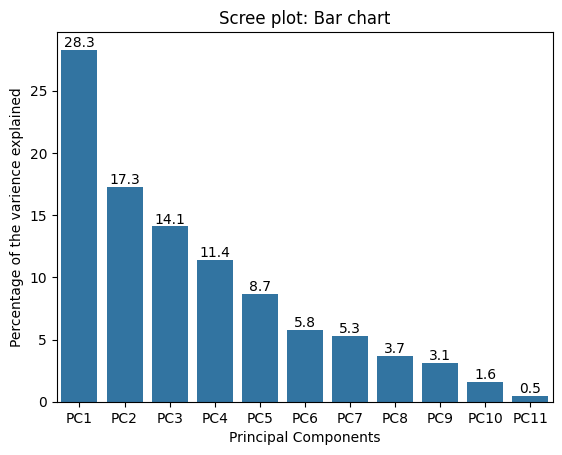

<Figure size 640x480 with 0 Axes>

In [22]:
p_labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

# Plot bar graph and highlight the 95% cut off
ax = sns.barplot(x=range(1, len(per_var) + 1), y=np.round(per_var, decimals=4))
ax.bar_label(ax.containers[0])
ax.set_xticklabels(p_labels)
plt.title('Scree plot: Bar chart')
plt.xlabel('Principal Components')
plt.ylabel("Percentage of the varience explained")
plt.show()
plt.clf()

In [23]:
# Load pca components
loadings = pca.components_

# Create a DataFrame with the loadings and feature names
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_pca.columns)

# Show the loadings
print(loadings_df)

                           PC1       PC2       PC3       PC4       PC5  \
fixed_acidity         0.485314 -0.111220 -0.128634 -0.235668 -0.087802   
volatile_acidity     -0.239395  0.276474 -0.443882  0.072777  0.251819   
citric_acid           0.462539 -0.155371  0.236545 -0.074551 -0.054695   
residual_sugar        0.134402  0.237869  0.114266 -0.405160  0.738541   
chlorides             0.214132  0.130783 -0.092317  0.653842  0.285699   
free_sulfur_dioxide  -0.023138  0.512461  0.436809 -0.022181 -0.160125   
total_sulfur_dioxide  0.036027  0.576338  0.327314 -0.028156 -0.178251   
density               0.391745  0.230628 -0.349774 -0.179819  0.136141   
pH                   -0.444253  0.002242  0.055122 -0.002776  0.232005   
sulphates             0.250491 -0.054744  0.262850  0.540297  0.238350   
alcohol              -0.117892 -0.402980  0.465276 -0.128042  0.335015   

                           PC6       PC7       PC8       PC9      PC10  \
fixed_acidity        -0.107940  0.361

Note
- Since the volume of features is manageable, we don't necessaritly need to remove components, however it will still improve the efficiency of our model

In [24]:
# Reduce components to 9 and transform
pca = PCA(n_components=9)
pca_data = pca.fit_transform(df_scaled_pca)

Identifying the 3 clusters 

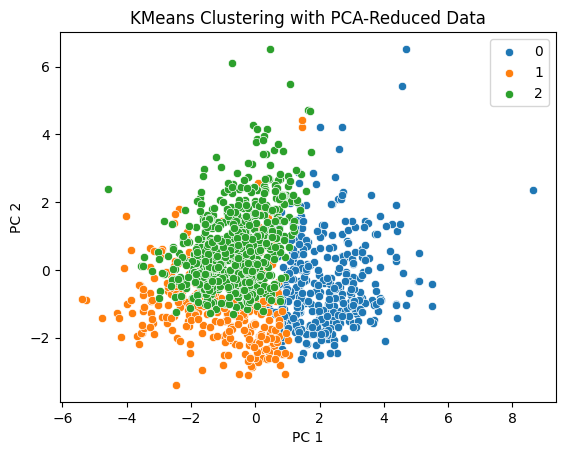

In [25]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(pca_data)
unique_labels = np.unique(label)

# Plot Kmeans
for i in unique_labels:
    sns.scatterplot(x=pca_data[label== i,0], y=pca_data[label== i, 1], label=i)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering with PCA-Reduced Data')
plt.show()

### Results & Analysis

In [26]:
# Copy original dataframe
df_cluster = df

# Add cluster column to dataframe
df_cluster['cluster'] = label

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/4170787164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cluster, x='cluster', y='quality', palette= my_palette)


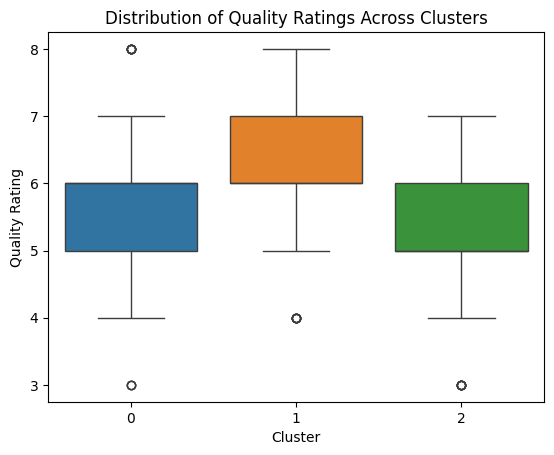

<Figure size 640x480 with 0 Axes>

In [27]:
# Align boxplot color with cluster color
my_palette = {'0':'tab:blue', '1':'tab:orange', '2': 'tab:green'}

# Plot the difference in quality distribution by cluster
sns.boxplot(data=df_cluster, x='cluster', y='quality', palette= my_palette)
plt.title('Distribution of Quality Ratings Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Quality Rating')
plt.show()
plt.clf()

To determine if there is a statistically significant difference in the quality rating of the 3 clusters, I will conduct a one-way anova test. If the test determines a significance difference between the groups, I will conduct a post-hoc test to determine which group is different
- Null Hypothesis: The means of the quality ratings for all three clusters are equal.
- Alternative Hypothesis: At least one of the cluster’s mean quality rating differs from the others.

In [28]:
# Create anova table
model = ols('quality ~ C(cluster)', data=df_cluster ).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract p_value
p_value = anova_table['PR(>F)']['C(cluster)']

# Print the results of the anova test
if p_value < 0.05:
    print('Based on an alpha of 5%, I reject the null hypothesis ( p-value = {} ). There is a significant difference between the clusters.'.format(p_value))
else:
    print(' Based on an alpha of 5%, fail to reject the null hypothesis ( p-value = {}) . There is no significant difference between the clusters.'.format(p_value))

print(anova_table)

Based on an alpha of 5%, I reject the null hypothesis ( p-value = 2.1912375966957614e-70 ). There is a significant difference between the clusters.
                sum_sq      df           F        PR(>F)
C(cluster)  194.050837     2.0  180.958219  2.191238e-70
Residual    727.054388  1356.0         NaN           NaN


In [29]:
# Perform a turkey test
tukey = pairwise_tukeyhsd(endog= df['quality'], groups= df['cluster'], alpha= 0.05)

# View results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.3415   0.0  0.2101  0.4729   True
     0      2  -0.5586   0.0 -0.6698 -0.4474   True
     1      2  -0.9001   0.0 -1.0172  -0.783   True
---------------------------------------------------


Based on the tukey test, we can confidently say that the clusters formed by the KMeans algorithm have distinct wine quality distributions.
- Cluster 0 has higher quality wines compared to Cluster 1.
- Cluster 2 has higher quality wines compared to both Cluster 0 and Cluster 1.

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/640968731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cluster, x='cluster', y=i, palette=my_palette, ax=axes[m, n])
/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/640968731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cluster, x='cluster', y=i, palette=my_palette, ax=axes[m, n])
/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/640968731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cluster, x='cluste

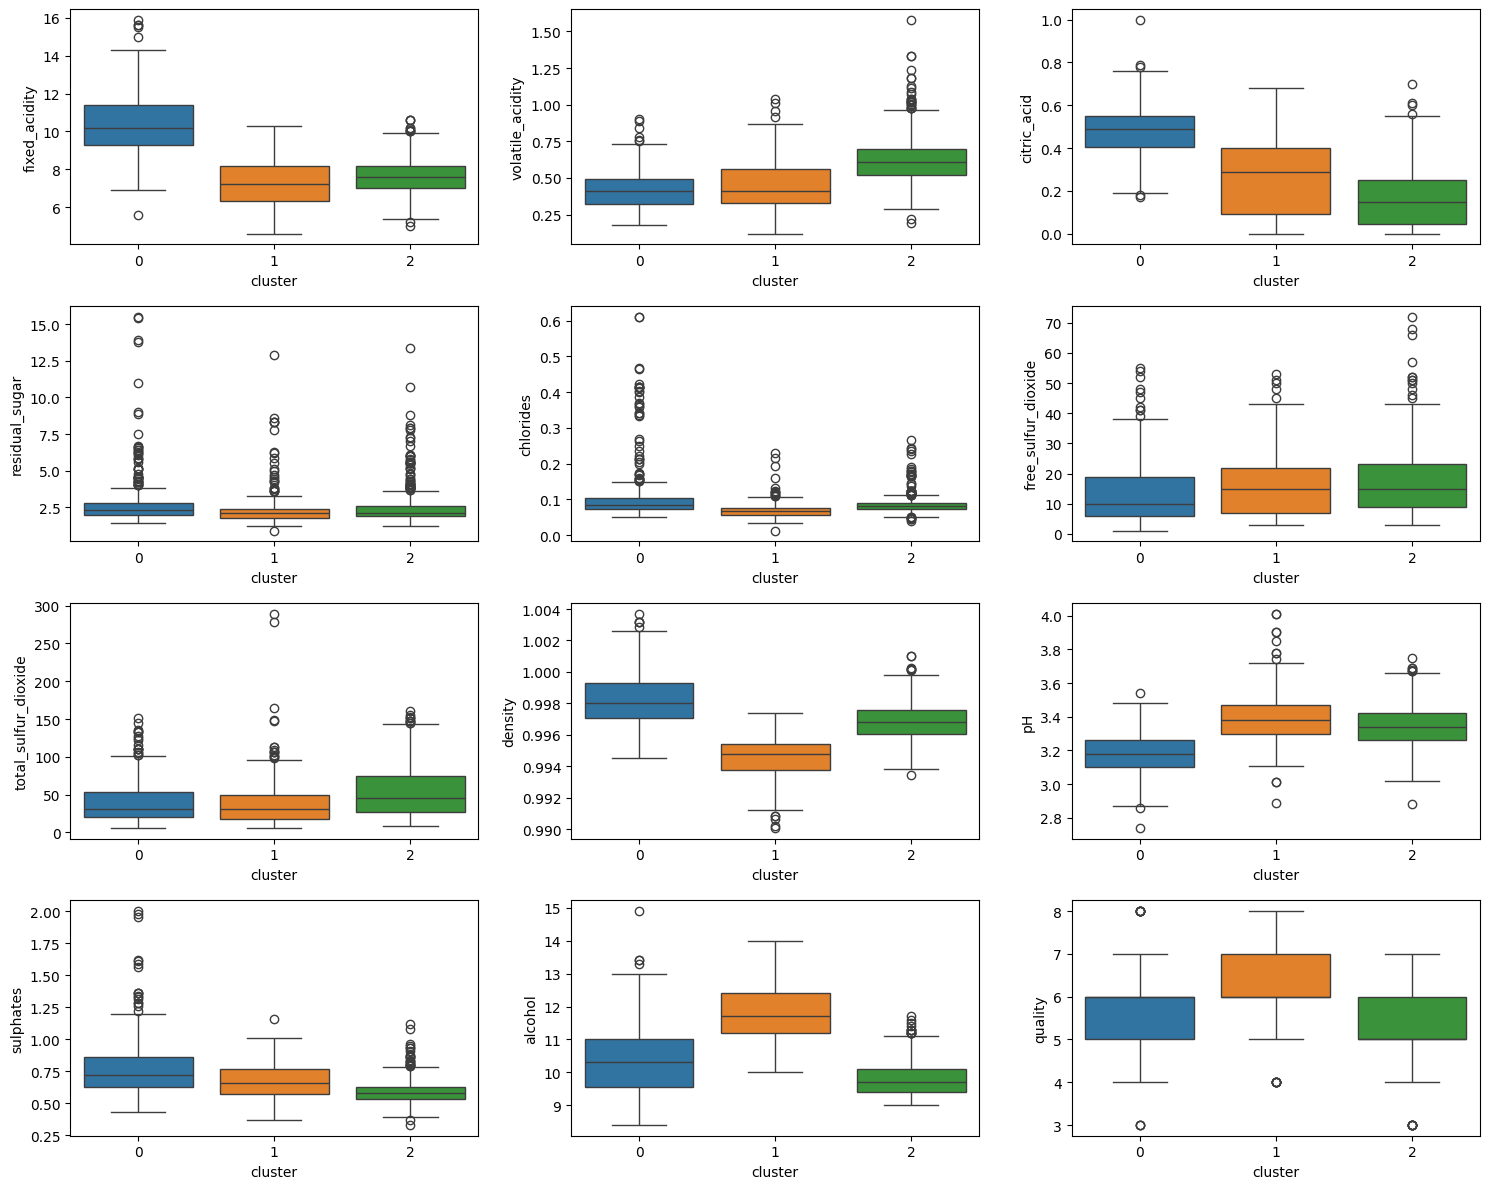

In [30]:
# create 4x3 subplot
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Initialize row and column indices
m, n = 0, 0

# Iterate through each column in the cluster_mean DataFrame
for i in df_cluster.columns:
    sns.boxplot(data=df_cluster, x='cluster', y=i, palette=my_palette, ax=axes[m, n])
    
    n += 1
    if n >= 3:  # Move to the next row after 3 columns
        n = 0
        m += 1
    if m >= 4:  # Stop if you reach 4 rows
        break

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [31]:
# View all columns
pd.set_option('display.max_columns', None)

# Describe features of each clusters
cluster_descriptions = df_cluster.groupby('cluster').describe()
cluster_descriptions

fixed_acidity                                                   \
                count       mean       std  min  25%   50%   75%   max   
cluster                                                                  
0               371.0  10.323450  1.606748  5.6  9.3  10.2  11.4  15.9   
1               317.0   7.283281  1.237343  4.6  6.3   7.2   8.2  10.3   
2               671.0   7.683010  0.911196  5.0  7.0   7.6   8.2  10.6   

        volatile_acidity                                                    \
                   count      mean       std   min   25%   50%   75%   max   
cluster                                                                      
0                  371.0  0.421995  0.125808  0.18  0.32  0.41  0.49  0.90   
1                  317.0  0.449953  0.162827  0.12  0.33  0.41  0.56  1.04   
2                  671.0  0.626475  0.166865  0.19  0.52  0.61  0.70  1.58   

        citric_acid                                                     \
              count      mean       std   min    25%   50%   75%   max   
cluster                                                                  
0             371.0  0.483181  0.127371  0.17  0.405  0.49  0.55  1.00   
1             317.0  0.255647  0.176664  0.00  0.090  0.29  0.40  0.68   
2             671.0  0.163636  0.131285  0.00  0.045  0.15  0.25  0.70   

        residual_sugar                                                \
                 count      mean       std  min  25%  50%  75%   max   
cluster                                                                
0                371.0  2.793127  1.745233  1.4  2.0  2.3  2.8  15.5   
1                317.0  2.370505  1.201281  0.9  1.8  2.1  2.4  12.9   
2                671.0  2.446498  1.134338  1.2  1.9  2.1  2.6  13.4   

        chlorides                                                         \
            count      mean       std    min    25%    50%    75%    max   
cluster                                                                    
0           371.0  0.109876  0.082344  0.050  0.074  0.085  0.104  0.611   
1           317.0  0.069492  0.022332  0.012  0.057  0.067  0.077  0.230   
2           671.0  0.084899  0.022919  0.039  0.074  0.080  0.089  0.267   

        free_sulfur_dioxide                                                    \
                      count       mean        std  min  25%   50%   75%   max   
cluster                                                                         
0                     371.0  13.803235   9.960820  1.0  6.0  10.0  19.0  55.0   
1                     317.0  16.168770  10.459948  3.0  7.0  15.0  22.0  53.0   
2                     671.0  16.918778  10.550859  3.0  9.0  15.0  23.0  72.0   

        total_sulfur_dioxide                                               \
                       count       mean        std  min   25%   50%   75%   
cluster                                                                     
0                      371.0  40.458221  28.104540  6.0  20.0  31.0  53.0   
1                      317.0  39.511041  33.005044  6.0  18.0  31.0  50.0   
2                      671.0  53.802534  34.868582  8.0  27.0  45.0  74.0   

               density                                                 \
           max   count      mean       std      min       25%     50%   
cluster                                                                 
0        151.0   371.0  0.998242  0.001591  0.99451  0.997095  0.9980   
1        289.0   317.0  0.994581  0.001333  0.99007  0.993740  0.9948   
2        160.0   671.0  0.996867  0.001172  0.99341  0.996050  0.9968   

                               pH                                              \
              75%      max  count      mean       std   min   25%   50%   75%   
cluster                                                                         
0        0.999325  1.00369  371.0  3.176307  0.116807  2.74  3.10  3.18  3.26   
1        0.995440  0.99740  317.0  3.393470  0

In [32]:
# Reset display settings
pd.reset_option('all')

/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/1457838032.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/gf/dq2q27v16rxg12671zrdw3nm0000gn/T/ipykernel_71968/1457838032.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [33]:
# Create anova table
model = ols('quality ~ C(cluster)', data=df_cluster ).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract p_value
p_value = anova_table['PR(>F)']['C(cluster)']

In [34]:
for i in df_cluster.columns:
    model = ols( '{} ~ C(cluster)'.format(i), data=df_cluster ).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(i)
    print(anova_table, '\n')
    

fixed_acidity
                 sum_sq      df           F         PR(>F)
C(cluster)  2101.973726     2.0  714.249834  1.359841e-212
Residual    1995.293691  1356.0         NaN            NaN 

volatile_acidity
               sum_sq      df          F        PR(>F)
C(cluster)  12.603941     2.0  259.82224  2.992367e-96
Residual    32.889688  1356.0        NaN           NaN 

citric_acid
               sum_sq      df           F         PR(>F)
C(cluster)  24.509539     2.0  606.190046  8.376595e-189
Residual    27.412967  1356.0         NaN            NaN 

residual_sugar
                 sum_sq      df          F    PR(>F)
C(cluster)    38.369932     2.0  10.639675  0.000026
Residual    2445.075962  1356.0        NaN       NaN 

chlorides
              sum_sq      df         F        PR(>F)
C(cluster)  0.292565     2.0  65.71783  5.740865e-28
Residual    3.018341  1356.0       NaN           NaN 

free_sulfur_dioxide
                   sum_sq      df          F   PR(>F)
C(cluster)    235

In [35]:
for i in df_cluster.columns:
    tukey = pairwise_tukeyhsd(endog= df[i], groups= df['cluster'], alpha= 0.05)
    print(i)
    print(tukey)
    

fixed_acidity
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -3.0402   0.0 -3.2579 -2.8225   True
     0      2  -2.6404   0.0 -2.8246 -2.4563   True
     1      2   0.3997   0.0  0.2058  0.5937   True
---------------------------------------------------
volatile_acidity
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1    0.028 0.0499    0.0 0.0559   True
     0      2   0.2045    0.0 0.1808 0.2281   True
     1      2   0.1765    0.0 0.1516 0.2014   True
--------------------------------------------------
citric_acid
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.2275   0.0  -0.253  -0.202   True
     0      2  -0.3195   0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


## Conclusion

Based on your analysis of the Wine Quality dataset, here are the key conclusions that can be drawn from the clustering and statistical testing results:

1. Distinct Clusters with Significant Differences:
- Using KMeans clustering, we identified three distinct clusters of wines. An ANOVA test, followed by a Tukey test, confirmed that these clusters represent statistically significant differences in wine quality, as the p-value (7.46e-29) was well below the 5% alpha threshold. This allows us to reject the null hypothesis that the clusters are similar.

2. Cluster Quality Comparisons:
- Cluster 0: Wines in this group have moderate quality scores but are outperformed by Cluster 2 in terms of overall quality.
- Cluster 1: This cluster consists of wines with lower quality scores compared to both Cluster 0 and Cluster 2.
- Cluster 2: Wines in this cluster exhibit the highest quality, with a clear distinction from both Cluster 0 and Cluster 1.

3. Feature Influence on Clusters:
- Wines in Cluster 0 generally exhibit lower alcohol content, higher volatile acidity, and slightly higher sulphate levels compared to Cluster 2.
- Wines in Cluster 1 are characterized by the highest fixed acidity and volatile acidity levels, contributing to their lower quality.
- Cluster 2 wines have higher alcohol content, moderate acidity, and lower sulphate levels, which likely contribute to their higher quality ratings.

4. Implications for Wine Producers:
- The clustering analysis suggests that alcohol content, volatile acidity, and sulphates are critical factors influencing wine quality. Producers seeking to improve the quality of their wines should focus on balancing these features, as wines with higher alcohol content and moderate acidity, similar to those in Cluster 2, consistently scored better in terms of quality.

By optimizing these variables, wine producers can potentially shift their products into the higher-quality segment, improving market competitiveness.